# Math 725

### Brent A. Thorne <brentathorne@gmail.com>

In class exercise detail.

## Ex 1.2 Midpoint Polygon Map

Suppose $V=(p_1,...,p_n)$, where $n$ is fixed.

$T:V\rightarrow V$

$(p_1,...,p_n) \xrightarrow{T} (\frac{p_1+p_2}{2},...,\frac{p_n+p_1}{2})$

In [19]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# fancy plot
def z_plot(Z, c=None):
    z= np.array(Z.tolist()).astype(np.complex64)
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')  

#### Note: Machine Epsilon

Half the distance between 1 and the next larger number. This can vary by computer. IEEE standards for double precision specify
$\epsilon_{machine}=2^{−53}≈1.11×10^{−16}$

We'll avoid any rounding issues by using symbolic algebra to do our calculations then approximate the numbers for plotting.

### Show Plot using Cartesian Matrix
FIXME!!! Extend example to any fraction of a side.

In [20]:
depth = 6
n=6
zeta = sym.exp(2*sym.I*sym.pi/n)
poly = Matrix([zeta**i for i in range(n)])

# use splitting matrix as given in lecture
# first we cook up a list with the first and last entries as defined
# then we build a Matrix rotating our list 'i' steps
m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
M = Matrix([m[-i:] + m[:-i] for i in range(n)]) # this type of loop is called comprehension

for i in range(depth):
    Z = M**i * poly # ****
# **** note M^i and matrix multiplcation is represented as such with sympy, numpy uses @ for mult instead
    
display(M)
display(poly)

display((Z).n(3)) # show rounded result of all the transformations
Z0 = Z # save for comparison below

Matrix([
[1/2,   0,   0,   0,   0, 1/2],
[1/2, 1/2,   0,   0,   0,   0],
[  0, 1/2, 1/2,   0,   0,   0],
[  0,   0, 1/2, 1/2,   0,   0],
[  0,   0,   0, 1/2, 1/2,   0],
[  0,   0,   0,   0, 1/2, 1/2]])

Matrix([
[             1],
[   exp(I*pi/3)],
[ exp(2*I*pi/3)],
[            -1],
[exp(-2*I*pi/3)],
[  exp(-I*pi/3)]])

Matrix([
[ -0.422 - 0.244*I],
[-0.e-11 - 0.487*I],
[  0.422 - 0.244*I],
[  0.422 + 0.244*I],
[-0.e-11 + 0.487*I],
[ -0.422 + 0.244*I]])

### Show Plot using Euler Matrix
FIXME!!! Extend example to any fraction of a side.

Matrix([
[1/2 + exp(-I*pi/3)/2,                    0,                    0,                    0,                    0,                    0],
[                   0, 1/2 + exp(-I*pi/3)/2,                    0,                    0,                    0,                    0],
[                   0,                    0, 1/2 + exp(-I*pi/3)/2,                    0,                    0,                    0],
[                   0,                    0,                    0, 1/2 + exp(-I*pi/3)/2,                    0,                    0],
[                   0,                    0,                    0,                    0, 1/2 + exp(-I*pi/3)/2,                    0],
[                   0,                    0,                    0,                    0,                    0, 1/2 + exp(-I*pi/3)/2]])

Matrix([
[-0.422 - 0.244*I],
[        -0.487*I],
[ 0.422 - 0.244*I],
[ 0.422 + 0.244*I],
[         0.487*I],
[-0.422 + 0.244*I]])

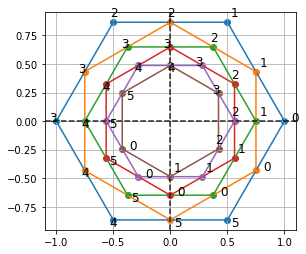

In [21]:
#zeta = sym.exp(2*sym.I*sym.pi/n)
#poly = Matrix([zeta**i for i in range(n)])
eta = sym.exp(-2*sym.I*sym.pi/n)  # fix up the direction
lambda_ = (1+eta)/2  # note direction fix up above

M = Matrix.diag([lambda_ for i in range(n)]) # Euler

for i in range(depth):
    Z = M**i * poly
    z_plot(Z)
    
display(M)
display((Z).n(3)) # show rounded result, note equiv result as above.  Pretty neat.

In [22]:
# show the results are the same to machine epsilon
z0= np.array(Z0.tolist()).astype(np.complex64)
z= np.array(Z.tolist()).astype(np.complex64)
np.allclose(z0, z)

True

### ...and now for something completely different.

 + to animate we are going to push a vector to be plotted
 + each new vector will be used to normalize the stack
 + colour is maintained for the stack
 + stack is maintained to a set depth
 + do animation of normalization (rotation and scalling) 

Normalization is going to cause loss of precision.  We aren't going to be able to ingore this at some point


In [175]:
class polygon:  
    """
    imports point data and transform, then returns polygon object
    provides functions to transform, display and plot
    requires sympy Matrix     
    """
    def __init__(self, D, T):
        assert isinstance(D, Matrix) # eat matrix of points
        assert isinstance(T, Matrix) # eat transform matrix
        self.D = D
        self.T = T
        self.colors = ["green", "red",  "blue", "yellow"]
        self.colorIndex = 0        
            
    def display(self, depth = 1): # so pretty
        display( Latex(f'$TD={sym.latex(self.T**(depth))}\
        {sym.latex(self.D)}$' + \
        f'$={sym.latex(Matrix(self.T**(depth)*self.D).n(2))}$ * rounded to two decimal points')) 
    
    def show(self):
        plt.show()
        
    def export(self, depth = 0, scale=1):
        '''manim wants a list of 3 elements lists'''
        Y =  self.T**depth * self.D
        zz = np.array(Y.tolist()).astype(np.complex64) 
        s = np.abs(zz.max())
        if scale != 1:
            zz = zz*scale
        zz = zz *3       # 3x for animation
        x= np.real(zz)
        y= np.imag(zz)
        z= np.zeros(zz.shape[0])        
        return (np.column_stack((x,y,z)).tolist()), s
        
    def plot(self, *argv):
        init = True
        for ii in range(*argv):
            c=None
            Z =  self.T**ii * self.D 
            z = np.array(Z.tolist()).astype(np.complex64)
            lim = np.abs(z.max())
            n = len(z)
            plt.scatter(z.real, z.imag, c=c)
            if False:  # suppress indexes for now
                for i in range(len(z)): # this got a bit fancy
                    zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
                    plt.text(zz.real, zz.imag, i, fontsize=12)
            z = np.append(z,z[0]) # close the shape
            plt.plot(z.real, z.imag, c=c)
            plt.grid(visible=True);
            plt.gca().set_aspect("equal") # square grids are pretty
            plt.axhline(0, color='black', alpha = .2, linestyle='--')
            plt.axvline(0, color='black', alpha = .2, linestyle='--')
            if init:
                plt.gca().set_ylim(-lim,lim)
                plt.gca().set_xlim(-lim,lim)
                init = False

In [152]:
n=5
zeta = sym.exp(2*sym.I*sym.pi/n)
poly = Matrix([zeta**i for i in range(n)])

m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
M = Matrix([m[-i:] + m[:-i] for i in range(n)]) 

eta = sym.exp(-2*sym.I*sym.pi/n)  # fix up the direction
lambda_ = (1+eta)/2
MM = Matrix.diag([lambda_ for i in range(n)]) # Euler

In [153]:
z = np.array(poly.tolist()).astype(np.complex64)
z.max()

(1+0j)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

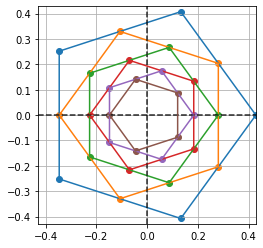

In [178]:
# create some polygon objects and use them
p = polygon(poly, M)  # René Descartes
q = polygon(poly, MM) # Leonhard Euler

# All Guass, No Brakes
p.display() # display at depth of 'n'
p.plot(4,10)  # show to 'n' deep, we can show a range
q.display()

In [187]:
# p.display()
display(p.export(depth=0,scale =  1))
display(p.export(depth=1,scale =  1))
display(p.export(depth=1,scale =  1/0.809017))
display(p.export(depth=2,scale =  1/0.809017))
display(p.export(depth=2,scale =  1/0.6545085))

([[3.0, 0.0, 0.0],
  [0.9270510077476501, 2.8531696796417236, 0.0],
  [-2.427051067352295, 1.7633557319641113, 0.0],
  [-2.427051067352295, -1.7633557319641113, 0.0],
  [0.9270510077476501, -2.8531696796417236, 0.0]],
 1.0)

([[1.963525414466858, -1.4265848398208618, 0.0],
  [1.963525414466858, 1.4265848398208618, 0.0],
  [-0.75, 2.308262586593628, 0.0],
  [-2.427051067352295, 1.0164395367051604e-20, 0.0],
  [-0.75, -2.308262586593628, 0.0]],
 0.809017)

([[2.427051067352295, -1.7633559703826904, 0.0],
  [2.427051067352295, 1.7633559703826904, 0.0],
  [-0.9270510077476501, 2.8531696796417236, 0.0],
  [-3.0, 1.2563883957560981e-20, 0.0],
  [-0.9270510077476501, -2.8531696796417236, 0.0]],
 0.809017)

([[0.75, -2.308262586593628, 0.0],
  [2.427051067352295, 6.2819419787804906e-21, 0.0],
  [0.75, 2.308262586593628, 0.0],
  [-1.963525414466858, 1.4265848398208618, 0.0],
  [-1.963525414466858, -1.4265848398208618, 0.0]],
 0.6545085)

([[0.9270509481430054, -2.8531692028045654, 0.0],
  [2.999999761581421, 7.764906776542227e-21, 0.0],
  [0.9270509481430054, 2.8531692028045654, 0.0],
  [-2.427050828933716, 1.7633554935455322, 0.0],
  [-2.427050828933716, -1.7633554935455322, 0.0]],
 0.6545085)

### Now do a random one
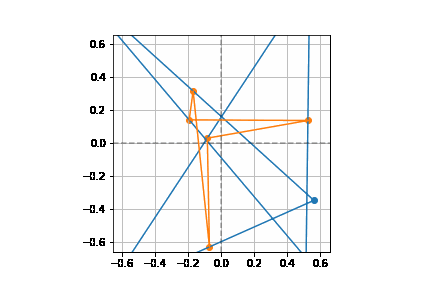

In [140]:
import random
n=5
P = Matrix([2*random.random()-1 + sym.I*(2*random.random()-1) for i in range(n)])
# we are being way too clever here...
# using matrix multiply to get an average 
center = (sym.ones(P.shape[0], 1).T*P/P.shape[0])[0] * sym.ones(P.shape[0], 1)

m = [sym.Rational(1,2)]  + [0 for i in range(n-2)] + [sym.Rational(1,2)] 
M = Matrix([m[-i:] + m[:-i] for i in range(n)]) 

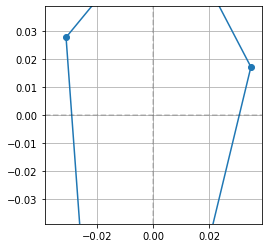

In [143]:
# let's try ordering our points by angle...
# something about cyclic groups...
# we'll need a Mathematician for this bit!
if False:
    dict = {sym.arg(p):p for p in list(P0)}
    k = sorted(dict)
    P = Matrix([dict[kk] for kk in k])
    
p = polygon(P-center, M)
p.plot(10,11)  # show to 'n' deep, we can show a range
p.show()

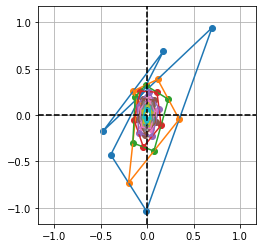

In [144]:
p.plot(10)

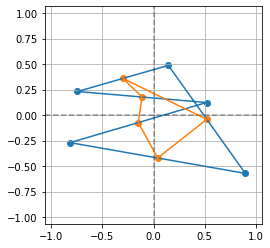

In [11]:
# animate a few samples  
from matplotlib.animation import FuncAnimation, PillowWriter
from os.path import exists
filename = "poly.gif"
    
fig, ax = plt.subplots()
s=2

def init():
    plt.grid()
    plt.gca().set_aspect("equal") 

def update(i):
    plt.clf()
    p.plot(i,i+s)
    #p.show()


rr = 3
r =  list(range(0,rr,s))+list(reversed(list(range(0,rr,s))))    
ani = FuncAnimation(fig, update, r, init_func=init)  
writer = PillowWriter(fps=2)  
ani.save(filename, writer=writer)
plt.show()